# Fun with Pandas
To get comfortable with the the **Pandas** package, I will base my practice off exercises from [DataCamp](http://www.datacamp.com) in this section of the notebook. Specifically I will demonstrate how great **Pandas** is for Exploratory Data Analysis, Data Wrangling, Data Preprocessing, Data Modeling and Data Visualization.



## Pandas Basics

In [50]:
import pandas as pd # Import Pandas as pd
import os 

## Imported Data with Pandas
We might even want to conduct a broader analysis of other baseball teams. The Pittsburgh Pirates team was kind enough to send us over a file of their 2018 team roster to take a look at and use in our study.


First thing we need to do is get that data into our environment quickly. Importing flat files using the **Pandas** package is considered the standard and best practice approach in **Python**.

In [134]:
# Store current working directory: curr_wd
curr_wd = os.getcwd()

# Store file name: file_pirates_roster
file_pirates_roster = '2018_PghPirates_Roster.csv'

# Load file as a Pandas Dataframe: df_pirates_roster
df_pirates_roster = pd.read_csv(curr_wd + '/data_sources/' + file_pirates_roster)

# Preview the data in df_pirates_roster
print(df_pirates_roster.head())

  Position   #             Name  Height  Weight Throws   Bats Date Of Birth
0  Pitcher  52  Tanner Anderson    6.17     195  Right  Right     5/27/1993
1  Pitcher  24     Chris Archer    6.17     195  Right  Right     9/26/1988
2  Pitcher  43    Steven Brault    6.00     195   Left   Left     4/29/1992
3  Pitcher  57       Nick Burdi    6.42     220  Right  Right     1/19/1993
4  Pitcher  30       Kyle Crick    6.33     220  Right   Left    11/30/1992


## Data Cleansing & Manipulation with Pandas

In [137]:
#
print('The dataframe has {0} rows and {1} columns'.format(df_pirates_roster.shape[0], df_pirates_roster.shape[1]))

#
print(df_pirates_roster.info())

The dataframe has 48 rows and 8 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
Position         48 non-null object
#                48 non-null int64
Name             48 non-null object
Height           48 non-null float64
Weight           48 non-null int64
Throws           48 non-null object
Bats             48 non-null object
Date Of Birth    48 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 3.1+ KB
None


After looking at our dataframe values, we see that one of the features/columns was loaded with the wrong data type, Date of Birth is set to an object, but should be a Date. The easiest way to remedy this is to reload the data but use the parse_dates parameter to the **Pandas** read_csv function:

In [139]:
# Load file as a Pandas Dataframe: df_pirates_roster
df_pirates_roster = pd.read_csv(curr_wd + '/data_sources/' + file_pirates_roster, parse_dates=['Date Of Birth'])

# Preview the reloaded data in df_pirates_roster
print('The dataframe has {0} rows and {1} columns'.format(df_pirates_roster.shape[0], df_pirates_roster.shape[1]))

#
print(df_pirates_roster.info())

The dataframe has 48 rows and 8 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
Position         48 non-null object
#                48 non-null int64
Name             48 non-null object
Height           48 non-null float64
Weight           48 non-null int64
Throws           48 non-null object
Bats             48 non-null object
Date Of Birth    48 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 3.1+ KB
None


In [141]:
# Rename the dataframe columns to be more descriptive
df_pirates_roster.columns = ['Position', 'Num', 'Full_Name', 'Height_ft', 'Weight_lbs', 'Throws_Hand', 'Bats_Hand', 'DoB']

# Check the columns are now more readable
print(df_pirates_roster.columns)

Index(['Position', 'Num', 'Full_Name', 'Height_ft', 'Weight_lbs',
       'Throws_Hand', 'Bats_Hand', 'DoB'],
      dtype='object')


In [142]:
# Create helper function to determine BMI Classification per NIH
def get_bmi_class(bmi_value):
    """Returns the BMI classification based on the given bmi_value 
    parameter passed into the function."""
    
    # Initialize return variable
    bmi_class = 'Unknown'
    
    if bmi_value < 18.5:
        bmi_class = 'Underweight'
    elif bmi_value >= 18.5 and bmi_value <= 24.9:
        bmi_class = 'Normal'
    elif bmi_value >= 25.0 and bmi_value <= 29.9:
        bmi_class = 'Overweight'
    elif bmi_value >= 30.0 and bmi_value <= 39.9:
        bmi_class = 'Obesity'
    else:
        bmi_class = 'Extreme Obesity'
    
    return(bmi_class)

from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [143]:
# Add new feature/column to convert Height from US feet to metric meter: df_pirates_roster['Height_m'] 
df_pirates_roster['Height_m'] = (df_pirates_roster['Height_ft'] * 12)* 0.0254

# Add new feature/column to convert Weight from US lbs to metric kg: df_pirates_roster['Weight_kg']
df_pirates_roster['Weight_kg'] = df_pirates_roster['Weight_lbs'] * 0.453592

# Add new feature/column to calculate the player's BMI using our metric values: df_pirates_roster['BMI']
df_pirates_roster['BMI'] = df_pirates_roster['Weight_kg'] / df_pirates_roster['Height_m'] ** 2

# Add new feature/column to label player's BMI classification per NIH: df_pirates_roster['BMI_class']
df_pirates_roster['BMI_class'] = df_pirates_roster.apply(lambda row: get_bmi_class(row['BMI']), axis=1)

# Add new feature/column to label player's age: df_pirates_roster['Age]
df_pirates_roster['Age'] = df_pirates_roster.apply(lambda row: calculate_age(row['DoB']), axis=1)

print(df_pirates_roster.head())

  Position  Num        Full_Name  Height_ft  Weight_lbs Throws_Hand Bats_Hand  \
0  Pitcher   52  Tanner Anderson       6.17         195       Right     Right   
1  Pitcher   24     Chris Archer       6.17         195       Right     Right   
2  Pitcher   43    Steven Brault       6.00         195        Left      Left   
3  Pitcher   57       Nick Burdi       6.42         220       Right     Right   
4  Pitcher   30       Kyle Crick       6.33         220       Right      Left   

         DoB  Height_m  Weight_kg        BMI   BMI_class  Age  
0 1993-05-27  1.880616   88.45044  25.009197  Overweight   25  
1 1988-09-26  1.880616   88.45044  25.009197  Overweight   30  
2 1992-04-29  1.828800   88.45044  26.446461  Overweight   26  
3 1993-01-19  1.956816   99.79024  26.060821  Overweight   25  
4 1992-11-30  1.929384   99.79024  26.807155  Overweight   26  


## Exploratory Data Analysis with Pandas


### Visual EDA
To help us gain some insight into our data, we want to create a visual to show the distribution of bmi values amongst the players. A great way to accomplish this is by using a histogram to show the distributions. The **Matplotlib** package has some great visual graphs that can be easily implemented in **Python**, as well as the **Seaborn** visualization package for additional visual styling and plotting abilities.

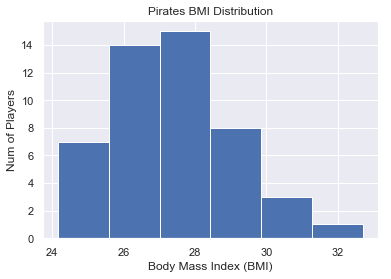

In [144]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

# Set default Seaborn Stle
sns.set()

# Determine the number of bins to use for our histogram. 
# Note: The "square root rule" is a commonly-used rule of thumb for choosing number of bins: 
# choose the number of bins to be the square root of the number of samples.
n_data = len(df_pirates_roster)
n_bins = int(np.sqrt(n_data))

# Plot a histogram of the BMI column from our dataframe and label the axes: hist_bmi
hist_bmi = plt.hist(df_pirates_roster['BMI'], bins=n_bins)
hist_bmi = plt.xlabel('Body Mass Index (BMI)')
hist_bmi = plt.ylabel('Num of Players')
hist_bmi = plt.title('Pirates BMI Distribution')

# Show histogram
plt.show()

By looking at the histogram we can see the majority of the Pittsburgh Pirates players are in the 26 to 30 BMI range. This is very interesting, however we must keep in mind the one drawback of using histograms is that the same dataset can look different different depending on the number of bins used. This can introduce 'Binning bias' - the same data maybe interpreted differently depending on choise of bins.

One way to combat possible binning bias is to try a Swarm Plot:

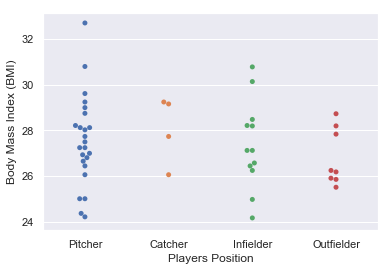

In [145]:
swarm_bmi_class = sns.swarmplot(x='Position', y='BMI', data=df_pirates_roster)
swarm_bmi_class = plt.xlabel('Player''s Position')
swarm_bmi_class = plt.ylabel('Body Mass Index (BMI)')
plt.show()

The swarmplot is much more detailed than our histogram. We can easily see that the majority of the players tend to have a BMI in the 25 to 30 range. As you can see, with the additional detail given by this plot we can come to more percise insight as well as additional insight by adding the Player's Position feature.


Another visual EDA that is often leveraged is the **Empirical Cumulative Distribution Function (ECDF)**.
ECDF are useful to show all the data and gives a complete picture of how the data is distributed. In an ECDF the x value is the quantity you are measuring, in this case the BMI value, while the y value is the fraction of datapoints that have a value smaller than the associated x value. 


Since this is a commonly used EDA method, let's start by creating a reusable function:

In [146]:
# Creating function to compute ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements, returning two arrays (x, y)"""
    
    # Calculate the number of data points: n
    n = len(data)
    
    # Store sorted x-data values for the ECDF: x
    x = np.sort(data)
    
    # Store y-data (evenly spaced datapoints with a max of 1) for the ECDF: y
    y = np.arange(1, n + 1) / n
    
    return x, y

Let's explore the player's data a little more by computing a Empirical Cumulative Distribution Function (ECDF) leveraging the function we created above.

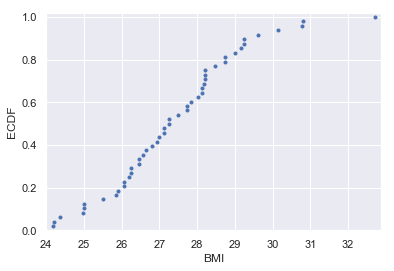

In [147]:
# Compute ECDF for BMI data: ecdf_x, ecdf_y
ecdf_x, ecdf_y = ecdf(df_pirates_roster['BMI'])

# Plot the ecdf using datapoints ('.'), not line (linestyle is none): ecdf_bmi
ecdf_bmi = plt.plot(ecdf_x, ecdf_y, marker=".", linestyle='none')

# Label our axies accordingly
ecdf_bmi = plt.xlabel('BMI')
ecdf_bmi = plt.ylabel('ECDF')

# Set the margins to keep data off plot edges - 2% buffer around the plot
plt.margins(0.02) 

# Show ECDF plot
plt.show()

Here we are able to see that the majority of the players ( 80 % ) are less than or equal to a BMI of 30, so the players tend to be 'Overweight' or 'Normal'. 

What might be interesting is comparing the ECDF BMI values between each player position.

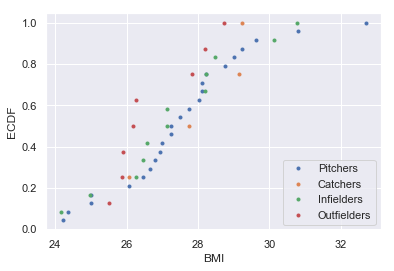

In [148]:
# Compute ECDFs for all player positions
x_pitchers, y_pitchers = ecdf(df_pirates_roster.loc[df_pirates_roster['Position'] == 'Pitcher']['BMI'])
x_catchers, y_catchers = ecdf(df_pirates_roster.loc[df_pirates_roster['Position'] == 'Catcher']['BMI'])
x_infielders, y_infielders = ecdf(df_pirates_roster.loc[df_pirates_roster['Position'] == 'Infielder']['BMI'])
x_outfielders, y_outfielders = ecdf(df_pirates_roster.loc[df_pirates_roster['Position'] == 'Outfielder']['BMI'])

# Plot all ECDFs on the same plot
ecdf_bmi_class_comp = plt.plot(x_pitchers, y_pitchers, marker='.', linestyle='none')
ecdf_bmi_class_comp = plt.plot(x_catchers, y_catchers, marker='.', linestyle='none')
ecdf_bmi_class_comp = plt.plot(x_infielders, y_infielders, marker='.', linestyle='none')
ecdf_bmi_class_comp = plt.plot(x_outfielders, y_outfielders, marker='.', linestyle='none')

# Annotate the plot
ecdf_bmi_class_comp = plt.legend(('Pitchers', 'Catchers', 'Infielders', 'Outfielders'), loc='lower right')
ecdf_bmi_class_comp = plt.xlabel('BMI')
ecdf_bmi_class_comp = plt.ylabel('ECDF')

# Display the plot
plt.show()

The ECDFs clearly show the differences amoung the different player positions. Looks like Outfield players tend to have their BMIs in the normal range, while the 'Obese' or higher tend to be Pitchers. Pitchers also seem to have more variability than the other positions.

### Quantitative EDA
Now that we explored our data graphically to begin to understand out dataset, we should conduct Quantitative exploratory data analysis to compute useful summary statistics to allow us to concisely describe salient features of our data dataset.


Let's start by calculating some measures of central tendancy for the player's BMI

In [149]:
# Average BMI
bmi_mean = np.mean(df_pirates_roster['BMI'])
bmi_median = np.median(df_pirates_roster['BMI'])

print('The average BMI for a Pittsburgh Pirate''s player is {0}, while the median is {1}'
      .format(bmi_mean, bmi_median))

The average BMI for a Pittsburgh Pirates player is 27.41613898217958, while the median is 27.24540329478862


The median is important here because unlike the mean, it is not impacted by outliers. The median is also the 50th percentile, meaning 50% of the data are less than the median. Percentiles useful summary statistics and help provide additional insight from our ECDF plots.

In [150]:
# Specify array of percentiles: percentiles
percentiles = np.array([25, 50, 75])

# Compute an array of BMI percentiles: bmi_percentiles
bmi_percentiles = np.percentile(df_pirates_roster['BMI'], percentiles)

print(bmi_percentiles)

[26.23192397 27.24540329 28.28182923]


Now that we have computed our dataset percentiles, lets mix quantitative and visual EDA to help things stay concise with our various summary statistics. Lets compute the percentiles of our dataset and overlay the results to our ecdf_bmi ECDF plot from above:

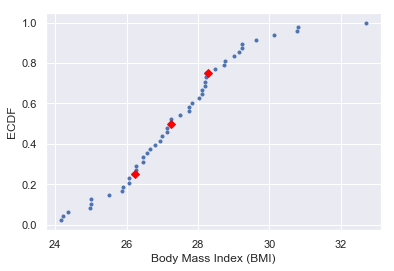

In [151]:
# Plot the ECDF
ecdf_bmi = plt.plot(ecdf_x, ecdf_y, '.')
ecdf_bmi = plt.xlabel('Body Mass Index (BMI)')
ecdf_bmi = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
ecdf_bmi = plt.plot(bmi_percentiles, percentiles/100, marker='D', color='red', linestyle='none')

# Show the plot
plt.show()

Even though our data set is not too large and the swarm plot and EDCF plot gave us some good insight, using a box plot will help us visualize the percentile summary to derive insight quickly.

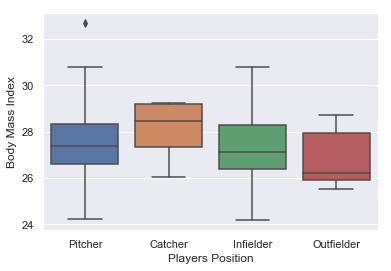

In [152]:
# Create box plot with Seaborn's default settings
boxplot_bmi = sns.boxplot(x='Position', y='BMI', data=df_pirates_roster)

# Label the axes
boxplot_bmi = plt.xlabel('Player''s Position')
boxplot_bmi = plt.ylabel('Body Mass Index')

# Show the plot
plt.show()

While computing the mean and median are useful to tell us the magnatitude of the data, we also need summary statistics that will help us understand the variabliity or spread of the data. 


For instance, we can quantify the spread of the BMI data for the player's position by computing the variance. The variance is the mean squared distance of the data from their mean, or a measure of the spread of the data. For each data point we square the distance from the mean then take the average of all the values. However, this returns a value with a different unit than the passed values. So, computing the Standard Deviation will be more useful to us.

In [154]:
# Compute the BMI variance
bmi_var = np.var(df_pirates_roster['BMI'])
bmi_std = np.std(df_pirates_roster['BMI'])

print('The variance of the overall data is {0}, with a standard deviation of {1}'.format(bmi_var, bmi_std))

The variance of the overall data is 3.1688903620961892, with a standard deviation of 1.7801377368327962


This tells us...

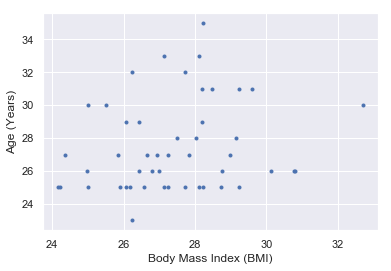

In [157]:
# Make a scatter plot
bmi_age_scatterplot = plt.plot(df_pirates_roster['BMI'], df_pirates_roster['Age'], marker='.', linestyle='none')

# Label the axes
bmi_age_scatterplot = plt.ylabel('Age (Years)')
bmi_age_scatterplot = plt.xlabel('Body Mass Index (BMI)')

# Show the result
plt.show()

In [158]:
# Compute the covariance matrix for bmi and age: bmi_age_cov
bmi_age_cov = np.cov(df_pirates_roster['BMI'], df_pirates_roster['Age'])

# Extract covariance of bmi and age of players: player_cov
player_cov = bmi_age_cov[0,1]

print('The covariance of players is {0}'.format(player_cov))

The covariance of players is 1.0059166208978632


The Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. 

In [159]:
# Compute the correlation matrix for bmi and age: bmi_age_corr_mat
bmi_age_corr_mat = np.corrcoef(df_pirates_roster['BMI'], df_pirates_roster['Age'])

# Compute Pearson correlation coefficient, Pearson r for bmi and age: bmi_age_pearson_r
bmi_age_pearson_r = bmi_age_corr_mat[0,1]

print('The Pearson r value for BMI and Age of players is {0}'.format(bmi_age_pearson_r))



The Pearson r value for BMI and Age of players is 0.20203860730090847
